# Install HAProxy and expose a service
Install and expose service eclwatch on HAProxy.

## Prerequisites
* HAProxy Ingress needs a running Kubernetes cluster. Controller version v0.12 needs Kubernetes 1.18 or newer, see other supported versions in the README file. HAProxy Ingress also works fine on local k8s deployments like minikube, kind or k3d.

* At least one cluster node is accessible externally. On cloud environments, a cloud load balancer can be configured to reach the ingress controller nodes.

* [Install Helm v3](https://github.com/amy88ma/Ingress-Configuration/blob/25172ac89b0efb4c7530b553b3fe219b704dd40f/Jupyter%20Notebooks/Install_helm.ipynb).

HAProxy Ingress uses TLS SNI extension and the Host header to associate requests and ingress’ hosts. The easiest way to accomplish this on local environment is using nip.io. A production environment should consider a dynamic DNS solution or a wildcard DNS record.

## Installation
HAProxy Ingress uses Helm chart to install and configure the controller. See below some deployment instructions:

1) Have Helm installed.

2) Add the HAProxy Ingress Helm repository. This will instruct Helm to find all available packages:

3) Check if kubeconfig points to the right cluster:

In [ ]:
$ helm repo add haproxy-ingress https://haproxy-ingress.github.io/charts

In [ ]:
$ kubectl cluster-info

4) Create a haproxy-ingress-values.yaml file with custom parameters.  Open a file named **haproxy-ingress-values.yaml**, and copy in the following:

In [ ]:
controller:
  hostNetwork: true

HAProxy Ingress chart documentation has all the available options. See also further documentation in the default values file.

5) Install HAProxy Ingress using haproxy-ingress as the release name and **haproxy-ingress-values.yaml** file as the custom parameters:

namespace: instructing helm to install HAProxy Ingress in the ingress-controller namespace. This namespace will be created if it does not exist yet. The default behavior, if namespace is not provided, is to deploy the controller in the kubectl’s current namespace.

In [ ]:
$ helm install haproxy-ingress haproxy-ingress/haproxy-ingress\
  --create-namespace --namespace ingress-controller\
  --version 0.12.6\
  -f haproxy-ingress-values.yaml

In [ ]:
NAME: haproxy-ingress
LAST DEPLOYED: Thu Jul 15 09:21:06 2021
NAMESPACE: ingress-controller
STATUS: deployed
REVISION: 1
TEST SUITE: None
NOTES:
HAProxy Ingress has been installed!

HAProxy is exposed as a `LoadBalancer` type service.
It may take a few minutes for the LoadBalancer IP to be available.
You can watch the status by running:

    kubectl --namespace ingress-controller get services haproxy-ingress -o wide -w

An example Ingress that makes use of the controller:

  apiVersion: networking.k8s.io/v1beta1
  kind: Ingress
  metadata:
    annotations:
      kubernetes.io/ingress.class: haproxy
    name: example
    namespace: default
  spec:
    rules:
      - host: www.example.com
        http:
          paths:
            - backend:
                serviceName: exampleService
                servicePort: 8080
              path: /

## Deploy and expose 
Deploy an application 'eclwatch', open a file named eclwatch-basic.yaml, and copy in the following:

In [ ]:
apiVersion: networking.k8s.io/v1beta1
kind: Ingress
metadata:
  annotations:
    kubernetes.io/ingress.class: haproxy
  name: eclwatch-ingress
spec:
  rules:
   - http:
      paths:
      - backend:
          serviceName: eclwatch
          servicePort: 8010
        path: /

Create the application:

In [ ]:
$ kubectl apply -f eclwatch-basic.yaml
ingress.networking.k8s.io/eclwatch-ingress created

# Test the Ingress
HAProxy ingress exposes the server, which routes to eclwatch through port 8010.  To test this, get the external IP by specifying the namespace of the controller, and using the following command:

In [ ]:
$ kubectl get svc -n ingress-controller

This is used to test the routes for the ingress controller. Open a web browser to the IP address of the HAProxy ingress controller, such as EXTERNAL_IP. The application should be displayed in the web browser, as shown in the following example output:

In [ ]:
NAME              TYPE           CLUSTER-IP    EXTERNAL-IP   PORT(S)                      AGE
haproxy-ingress   LoadBalancer   10.0.156.10   20.85.26.99   80:31550/TCP,443:30550/TCP   41s

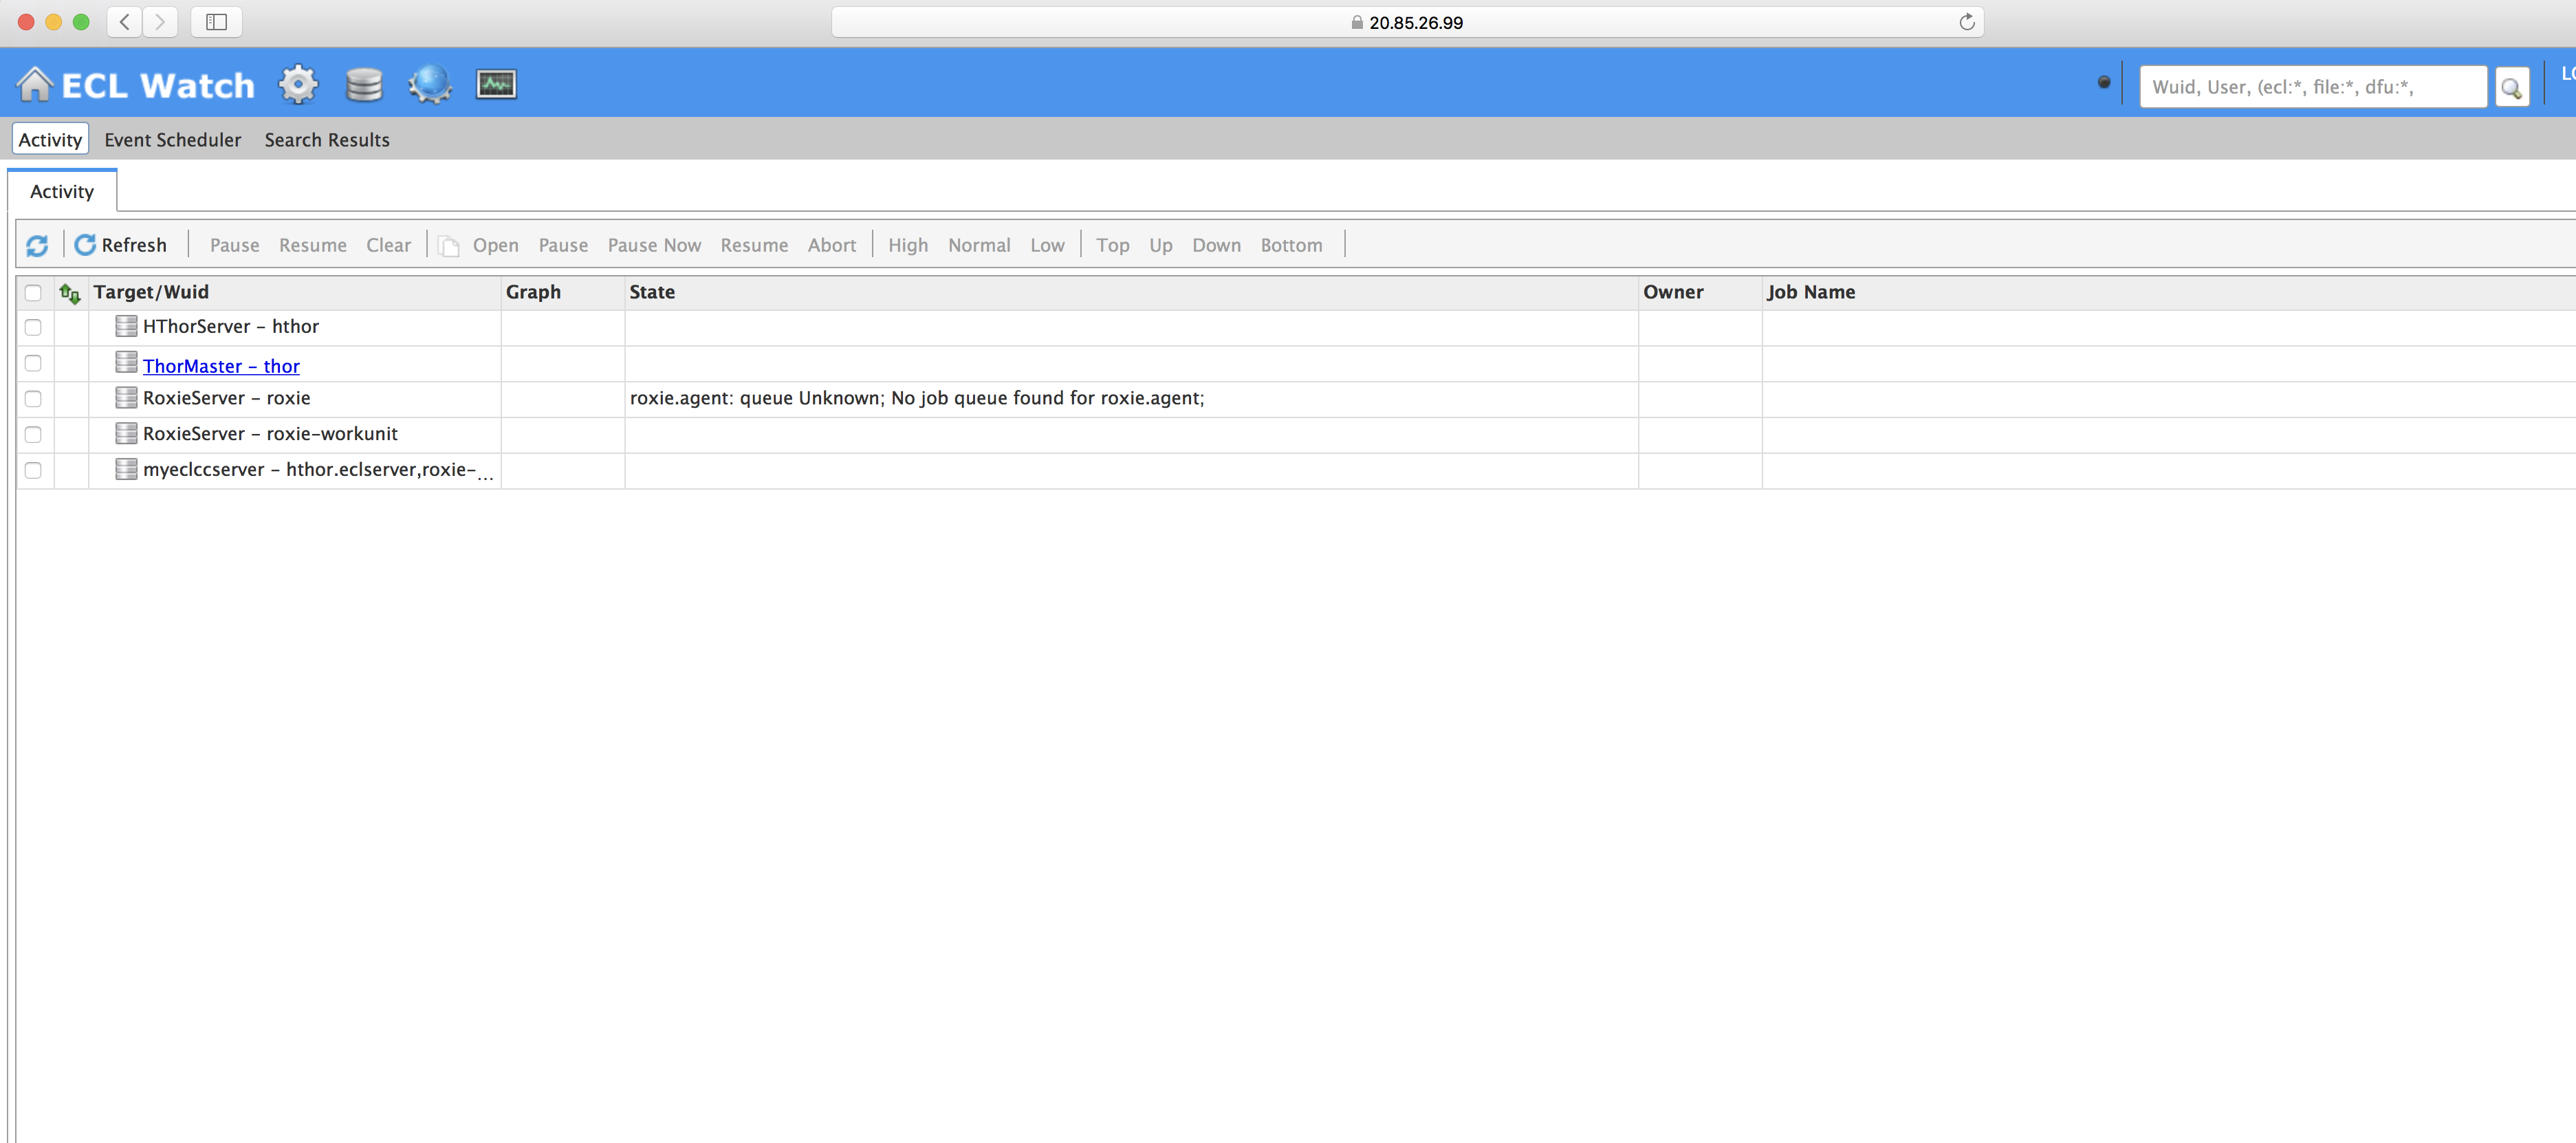